# Ejercicio 1 - Heladería

Se quiere calcular la catidad de clientes que tendrá una heladería dependiendo de la temperatura exterior.

- Si la temperatura es <b>alta</b> entonces la heladería estará <b>llena</b>
- Si la temperatura es <b>moderada</b> entonces la heladería estará <b>ocupada</b>
- Si la temperatura es <b>baja</b> entonces la heladería estará <b>tranquila</b>

El número máximo de clientes para el local es de 35 clientes.
Definir los rangos de pertenencias para los antecedentes y consecuentes.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

## Antecendentes

Definir y graficar los antecedentes para el problema.

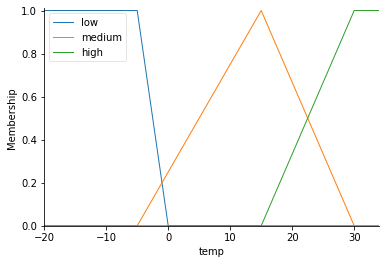

In [2]:
temp = ctrl.Antecedent(np.arange(-20, 35, 1), "temp")
temp["low"] = fuzz.trapmf(temp.universe, [-20, -20, -5, 0])
temp["medium"] = fuzz.trimf(temp.universe, [-5, 15, 30])
temp["high"] = fuzz.trapmf(temp.universe, [15, 30, 35, 35])

temp.view()

## Consecuentes

Definir y gráficar los antecedentes para el problema.

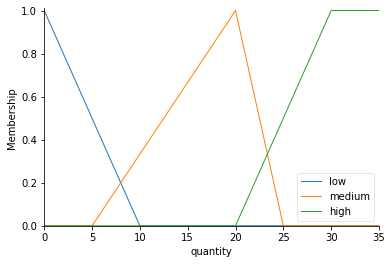

In [3]:
quantity = ctrl.Consequent(np.arange(0, 36, 1), 'quantity')
quantity["low"] = fuzz.trimf(quantity.universe, [0, 0, 10])
quantity["medium"] = fuzz.trimf(quantity.universe, [5, 20, 25])
quantity["high"] = fuzz.trapmf(quantity.universe, [20, 30, 35, 35])
quantity.view()

## Reglas

Definir las reglas para el sistema.

In [4]:
quantity.deffuzify_method = "mom"
rules = []
rules.append(ctrl.Rule(temp["high"], quantity["high"]))
rules.append(ctrl.Rule(temp["medium"], quantity["medium"]))
rules.append(ctrl.Rule(temp["low"], quantity["low"]))

## Simulación

Simular y graficar la salida del sistema para las siguientes temperaturas.
 - -10º
 - 0º
 - 10º
 - 14º
 - 20º
 - 33 º

cantidad: 3.333333333333333
cantidad: 15.595238095238097
cantidad: 16.5
cantidad: 16.658730158730155
cantidad: 20.197530864197514
cantidad: 29.583333333333332


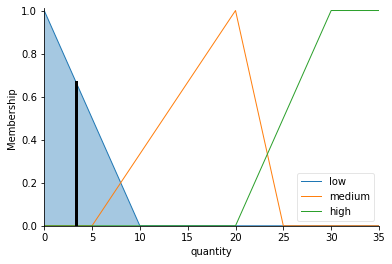

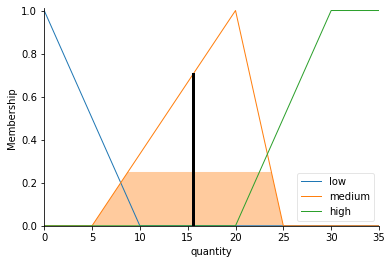

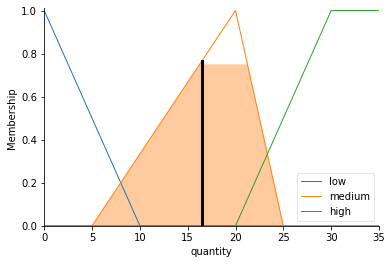

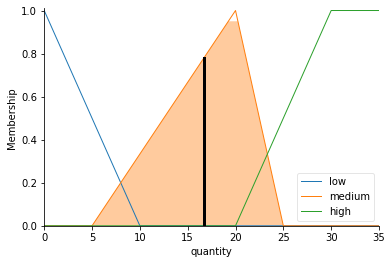

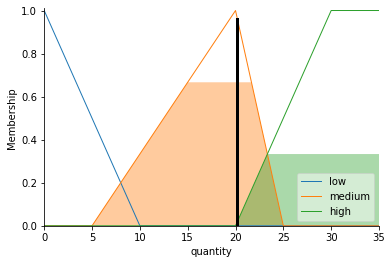

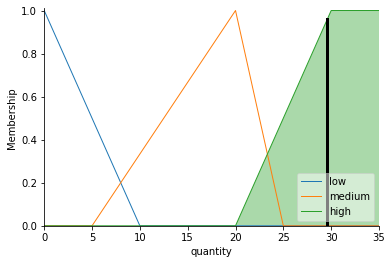

In [5]:
ctrSys = ctrl.ControlSystem(rules)
customers = ctrl.ControlSystemSimulation(ctrSys)
values = [-10, 0, 10, 14, 20, 33]
for val in values:
    customers.input["temp"] = val
    customers.compute()
    # customers.print_state()
    quantity.view(sim=customers)
    print(f"cantidad: {customers.output['quantity']}")

- **Prueba para -10** = 5 Personas
- **Prueba para 0°** = 15 personas
- **Prueba para 10°** = 16 personas
- **Prueba para 14°** = 16 personas
- **Prueba para 20°** = 20 personas
- **Prueba para 33°** = 29 personas